In [ ]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

## 선형회귀

데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측한 것이다. 주로 사용되는 2차선에서의 직선이란 기울기와 y절편을 가지는 좌표평면 위 점들의 집합이다.

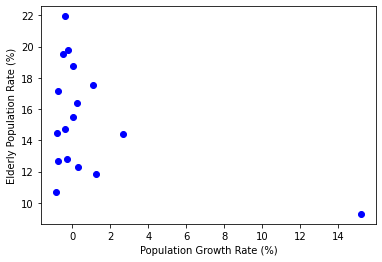

In [3]:
# 4.1 지역별 인구증가율과 고령인구비율 시각화
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

오른쪽 아래 치우친 점을 극단치라 부른다. 이러한 극단치는 제거하는게 좋다.

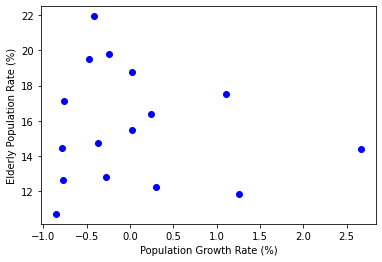

In [ ]:
# 4.2 지역별 인구증가율과 고령인구비율 시각화: 극단치 제거
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

데이터의 경향성을 가장 잘 설명하는 하나의 직선과 각 데이터의 차이를 잔차라고 한다. 잔차의 제곱을 최소화 하는 알고리즘을 최소제곱법이라 한다.

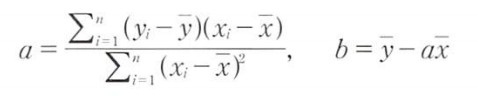

a: -0.355834147915461 b: 15.669317743971302


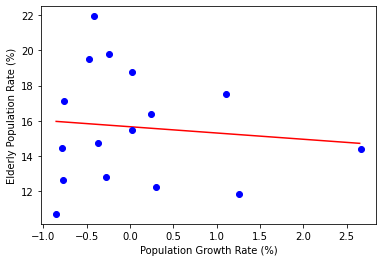

In [ ]:
# 4.3 최소제곱법으로 회귀선 구하기
import numpy as np
import matplotlib.pyplot as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균을 구합니다.
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a, b를 구합니다.
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선을 그립니다.
plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

인구증가율을 x로 놓고 고령인구비율을 y로 놓았다. 최소제곱법으로 a, b를 구하는 부분에서 두개 이상의 리스트를 하나로 묶는 list(zip()) = list[(Y,X)]을 사용했다.
그래프를 그리기 위해서는 x의 변화량에 따른 y 예측값을 구해야 한다.
넘파이를 임포트하고 arange()라는 함수를 사용해 실숫값으로 구성된 넘파이 array를 만들었다. 그다음 y예측값은 단순히 x값에 a를 곱하고 b를 더하면 된다.

99 a: 0.1159296 b: 6.778445 loss: 88.64506
199 a: -0.12152829 b: 11.252822 loss: 29.240992
299 a: -0.25902745 b: 13.844567 loss: 13.102794
399 a: -0.3230356 b: 15.05109 loss: 10.162123
499 a: -0.34676644 b: 15.49841 loss: 9.809944
599 a: -0.35379773 b: 15.630941 loss: 9.782273
699 a: -0.35546538 b: 15.662374 loss: 9.780852
799 a: -0.35578042 b: 15.668317 loss: 9.780804
899 a: -0.35582882 b: 15.669206 loss: 9.780804
999 a: -0.3558327 b: 15.669302 loss: 9.780804


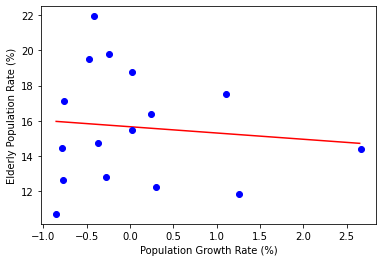

In [ ]:
# 4.4 텐서플로를 이용해서 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

a, b를 랜덤값으로 초기화 한후 잔차의 제곱의 평균함수를 정의한다. 잔차의 제곱을 모두 더해서 평균낸값을 loss라고 한다. 최적화함수는 손실을 최소화 시키는 편리한 도구다. Adam이 좋다.

for 문에서 1000번 돌리면서 옵티마이저를 실행시킨다. 첫번째 인수는 최소화할 손실을 전달하고, 두번째인수인 var_list는 학습시킬 변수 리스트를 전달해야한다.
a,b는 잔차의 제곱의 평균을 최소화하는 적절한 값에 도달한다.

## 다항회귀

비선형 회귀는 선형 회귀로는 표현못할 데이터의 경향성을 설명하기 위한 회귀다. 세제곱등을 사용한 다항식이 다항회귀다.

99 a: 3.7929144 b: -5.458801 c: 6.7073 loss: 65.66057
199 a: 2.7375696 b: -4.4761276 c: 10.445666 loss: 30.459404
299 a: 1.2553327 b: -2.2613988 c: 13.004351 loss: 15.76479
399 a: 0.31199953 b: -0.84203815 c: 14.60648 loss: 10.922732
499 a: -0.19279966 b: -0.08286354 c: 15.465663 loss: 9.720083
599 a: -0.4259554 b: 0.26775384 c: 15.862659 loss: 9.492832
699 a: -0.51925683 b: 0.40805763 c: 16.021536 loss: 9.460043
799 a: -0.5516543 b: 0.45677498 c: 16.07671 loss: 9.456432
899 a: -0.56140536 b: 0.4714392 c: 16.093307 loss: 9.456132
999 a: -0.56394047 b: 0.47525123 c: 16.097626 loss: 9.456111


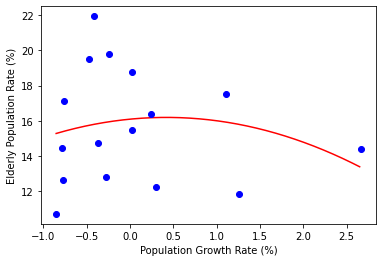

In [ ]:
# 4.5 텐서플로우를 이용해서 2차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X + b * X + c
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

4.4와 달라진 부분은 c를추가하고 a와 b를 가각 2차항과 1차항의 계수로 바꿧으면 y_pred를 직선대신 2차함수로 바꿧다. 직선회귀선보다 손실이 소량 감소했다.

99 a: -1.1142861 b: 5.711878 c: -3.9513135 d: 6.547641 loss: 61.419426
199 a: -1.9516034 b: 6.67991 c: -2.1833687 d: 10.073953 loss: 29.873524
299 a: -1.6331583 b: 5.0079584 c: -0.913034 d: 12.198114 loss: 19.666233
399 a: -0.8960596 b: 2.7080026 c: -0.5757946 d: 13.67373 loss: 14.026865
499 a: -0.1958986 b: 0.65883267 c: -0.48298806 d: 14.7860365 loss: 10.8239
599 a: 0.35044307 b: -0.92285466 c: -0.43920192 d: 15.615858 loss: 9.195229
699 a: 0.7408503 b: -2.0510345 c: -0.41124707 d: 16.204012 loss: 8.457433
799 a: 1.0020422 b: -2.8055205 c: -0.3929999 d: 16.596764 loss: 8.159087
899 a: 1.1663555 b: -3.2801023 c: -0.38160905 d: 16.843685 loss: 8.051363
999 a: 1.2636433 b: -3.5610828 c: -0.37488243 d: 16.989857 loss: 8.01666


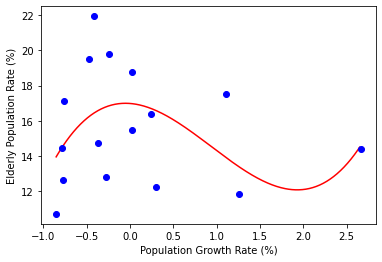

In [ ]:
# 4.6 텐서플로우를 이용해서 3차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c, d를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X*X + b * X*X + c * X + d
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c,d])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

In [4]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_get_running_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setp',
 '_setup_pyplot_info_docstrings',
 '_show',
 'acorr',
 'angle_spectrum',
 'annotate',
 'arrow',
 'autoscale',

3차 함수로 그렸지만 손실이 훨신 커졌다. 어떤게 적절한지 모르니 최적의 회귀식을 넣어보면서 찾아야 한다.

## 딥러닝 네트워크를 이용한 회귀

AND, OR, XOR 연산을 하는 네트워크처럼 딥러닝 네트워크를 만들수 있다.

In [ ]:
# 4.7 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


첫번째 레이어는 뉴런 6개를 할당했다. 뉴런이 많을수록 표현력이 좋아지지만 너무 많으면 학습이 제대로 안되거나 과적합(overfittting)될수있다. 두번째 레이어는 x입력값에 대한 하나의 y값만 출력해야되기 때문에 뉴런이 1개다.

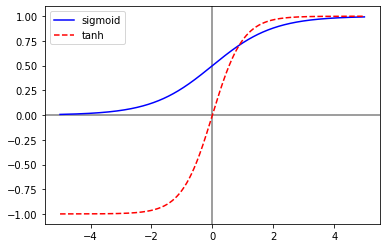

In [ ]:
# 그림 4.2 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()

딥러닝 model은 Dense레이어로 구성된다. 첫번째 Dense레이어는 활성화함수로 tanh를 사용했다. tanh는 하이퍼볼릭 탄젠트 함수로 삼각함수중 탄젠트 함수와 연관이 있으며 -1과 1 사이의 출력을 반환한다.

옵티마이저의 손실은 평균제곱오차로서, 잔차의 제곱의 평균이 되기 때문에 손실을 줄이는 학습하면 된다.

In [ ]:
# 4.8 딥러닝 네트워크의 학습
model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 255.2160
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 139.1990
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 21.7308
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 9.5959
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 9.4738
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 9.4491
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 9.4271
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 9.4039
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 9.3793
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 9.3532


X를 입력하면 Y가 정답이 되도록 10회 학습시킨다. 에포크 9, 10에 되서 손실에 변화가 거의 없으면 학습이 거의 다된것이다.

In [ ]:
# 4.9 딥러닝 네트워크의 Y값 예측
model.predict(X)

array([[15.951687],
       [15.636924],
       [15.129909],
       [16.002823],
       [15.29363 ],
       [15.971601],
       [15.958106],
       [15.853399],
       [15.644971],
       [15.905702],
       [15.578994],
       [15.885964],
       [15.947672],
       [16.00283 ],
       [15.652959],
       [13.97868 ]], dtype=float32)

학습이 끝나면 X를 입력했을때 딥러닝 네트워크가 어떤값을 예측하는지 확인해야한다. 15부근에서 값이 출력된다.

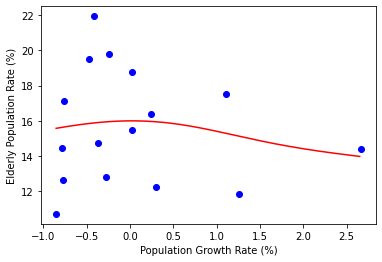

In [ ]:
# 4.10 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

4.2장의 다항 회귀와 비슷한 곡선이 나왓다. 차이점은 좀더 직선에 가까운 완만한 형태라는 것이다. 손실도 직선과 2차 함수와 비슷한 크기가 되서 2차함수와 비슷한 성능으로  X데이터에대해서 Y를 예측한다.

## 보스턴 주택 가격 데이터 세트

In [ ]:
# 4.11 데이터 불러오기
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


훈련(train) 데이터는 학습 과정에 사용되는 데이터, 테스트(test) 데이터는 학습 결과를 평가하기 위한 데이터다. 학습할 때는 훈련 데이터만 사용가능하고 테스트 데이터는 볼수없다.

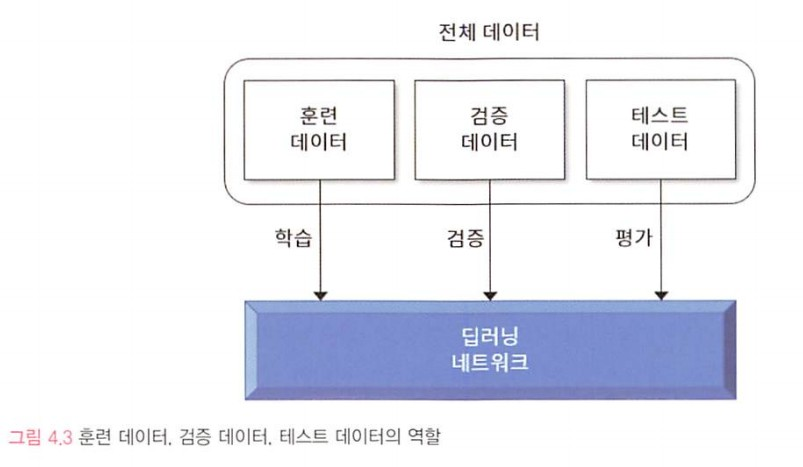

훈련 데이터로 학습할때 일부 데이터를 떼어내서 검증(validation) 데이터로 만들수있다. 학습이 잘되고 있는지 검증하는 용도로 쓰이고 검증 데이터가 잘 안나오면 학습을 중단할수있다. 딥러닝 네트워크의 가중치에 영향을 주는 데이터는 훈련 데이터 뿐이다.

데이터의 단위가 다르다. 딥러닝에서는 이러한 데이터를 전처리해서 정규화(Standardizaiotn) 해야 학습 효율이 좋다.

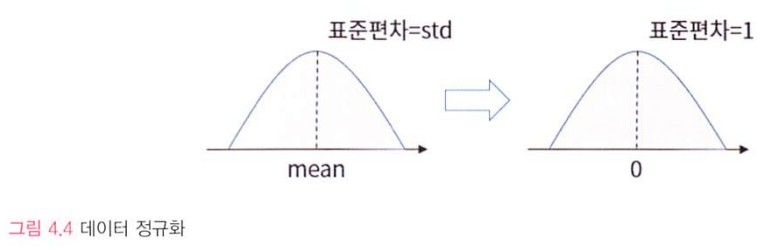

데이터를 정규화 하려면 각 데이터에서 평균값을 뺀 다음 표준편차로 나눈다. 이것은 데이터의 분포를 정규분포로 옮기는 역할을 한다. 평균과 표준편차를 구할때 훈련데이터의 평균과 표준편차를 구한 후 이것으로 테스트 데이터도 정규화 한다. 테스트 데이터는 어떤 분포를 띨지 알수가 없다. 따라서 훈련 데이터의 평균과 표준편차로 테스트 데이터를 정규화 한다.

In [ ]:
# 4.12 데이터 전처리(정규화)
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


전처리 결과 데이터가 정규분포에 들어가도록 바꿧다.

In [ ]:
# 4.13 Boston Housing Dataset 회귀 모델 생성
#Dense 레이어의 파라미터 수는 (입력측 뉴런의 수 +1(편향)) X (출력측 뉴런의 수)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),## input_shape 입력층 레이어
  
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 52)                728       
_________________________________________________________________
dense_53 (Dense)             (None, 39)                2067      
_________________________________________________________________
dense_54 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


데이터 양이 많기 때문에 뉴런의 수가 늘었다.
첫 번째 레이어에서는 X데이터의 속성을 모두 불러오기 위해 input_shape의 첫 번째 차원을 13으로 지정한다. 마지막 레이어는 주택가격인 Y값 1개만 예측하면되니까 뉴런수가 1개이다.


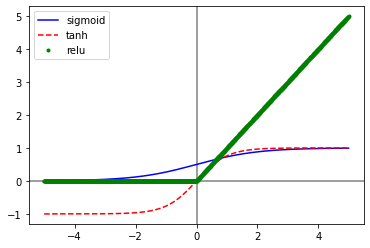

In [ ]:
# 그림 4.5 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

ReLU는 y=x 함수의 음수 부분을 정류해서 0으로 만든것이다. 여러개의 레이어를 겹쳐서 사용할때 좋은 결과를 얻을수있다.

In [ ]:
# 4.14 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 0s 14ms/step - loss: 7.6736 - val_loss: 0.9795
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.4896 - val_loss: 0.7573
Epoch 3/25
10/10 [==============================] - 0s 4ms/step - loss: 0.4261 - val_loss: 0.5312
Epoch 4/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2533 - val_loss: 0.4097
Epoch 5/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2566 - val_loss: 0.3902
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2321 - val_loss: 0.4288
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2329 - val_loss: 0.3442
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2379 - val_loss: 0.3748
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2126 - val_loss: 0.3530
Epoch 10/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1914 - val_loss: 0.3425
Epoch 11/25
10/10 

model.fit()에서 validation_split인수가 추가됬다. 훈련 데이터의 25% 정도를 검증 데이터로 떼서 학습 결과를 검증하기 위해  validation_split=0.25를 넣었다. 그 결과 각 에포크의 학습 결과 출력에 loss와 val_loss가 같이 출력된다.
loss는 꾸준히 감소하지만, val_loss는 loss보다 높은값을 유지하면서 항상 감소하지 않는다.

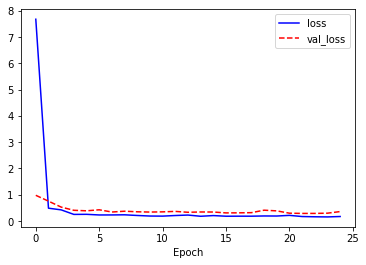

In [ ]:
# 4.15 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

loss는 꾸준히 감소하지만, val_loss는 loss보다 높은값을 유지하면서 항상 감소하지 않는다. 하지만 전체적으로 훈련데이터의 손실처럼 점점 감소하는 경향이다.

In [ ]:
# 4.16 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.2398


0.23975928127765656

훈련데이터가 보여주는 0.6보다 낮다.

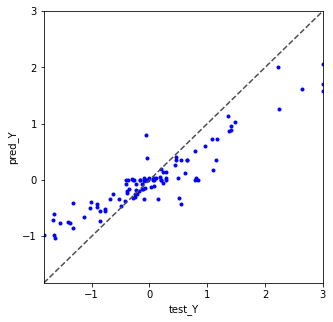

In [ ]:
# 4.17 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

실제 주택가격(test_Y)에 대해 에측 주택가격(Pred_Y)은 전체적으로 비슷한 모습을 보이지만 일부 떨어진 값도 보인다. 이상적인 데이터와는 거리가 있어보인다.

검증 데이터와 테스트 데이터는 훈련 데이터와 달리 네트워크의 가중치에 영항을 미치지 않는다는 공통점이 있다. 검증 데이터에 대한 성적이 좋아지면 테스트 데이터에 대한 성적도 좋아진다. 검증데이터 성적이 좋아지려면 val_loss가 높아지지 않도록, 즉 네트워크가 훈련 데이터에 과적합 되지 않도록 학습 도중에 멈춰야 한다.

도중에 끼어들기 위해 콜백(callback)함수를 사용한다. 콜백함수는 학습할때 에포크가 끝날 때마다 호출된다. model.fit()에 callbacks 인수를 넣어 지정할수있다.

In [ ]:
# 4.18 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 0s 14ms/step - loss: 3.5604 - val_loss: 1.2335
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.5836 - val_loss: 0.5440
Epoch 3/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2756 - val_loss: 0.3741
Epoch 4/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2300 - val_loss: 0.3584
Epoch 5/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2152 - val_loss: 0.5108
Epoch 6/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2419 - val_loss: 0.3619
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2068 - val_loss: 0.3245
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1852 - val_loss: 0.3158
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2193 - val_loss: 0.3044
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1884 - val_loss: 0.2878
Epoch 11/25
10/10 

EarlyStopping 학습을 일찍 멈추는 기능을 하는 함수다. patiece는 몇번의 에포크를 기준으로 삼을 것인지, monitor는 어떤 값을 지켜볼 것인지에 대한 인수다. 여기서는 val_loss가 3회의 에포크를 수행하는 동안 최고 기록을 갱신하지 못한다면 학습을 멈춘다. 여기서는 0.2878을 갱신 못해서 에포크20에서 멈췃다.

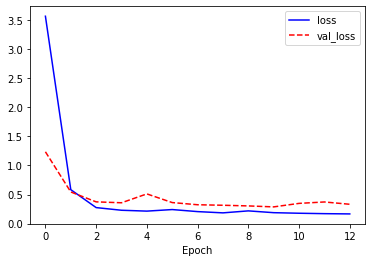

In [ ]:
# 4.19 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

검증 데이터의손실에 뚜렷한 증가세가 보이지 않는다.

In [ ]:
# 4.20 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.1807


0.1806718409061432

4.16보다 상대적으로 낮은 수치가 나왔다. 네트워크의 목적은 손실을 감소하는데 있기 때문에 학습은 더 잘됬다.

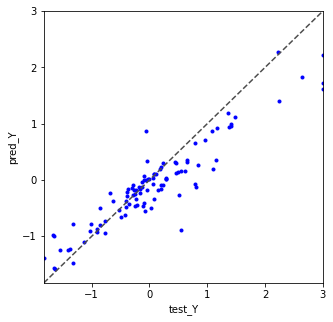

In [ ]:
# 4.21 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()